In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

In [13]:
# Step 1 traer datos
X,y = load_iris(return_X_y= True , as_frame= True)
df_raw = X
df_raw['target'] = y
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [20]:
# 2. Processing
df_interim = df_raw.copy()
df_interim.columns =  ['sepal_length_cm','sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'target']
df = df_interim[['target']].copy()
df = pd.concat([df,df_interim.drop(['target'], axis= 1)],axis = 1)
df['target'] = df['target'].astype('category')


In [21]:
# EDA 
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['target'], random_state=2024)

In [22]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
sepal_length_cm,120.0,5.852500,0.807420,4.3,5.1,5.80,6.4,7.7
sepal_width_cm,120.0,3.084167,0.428206,2.0,2.8,3.00,3.4,4.4
petal_length_cm,120.0,3.775000,1.750642,1.0,1.6,4.35,5.1,6.9
petal_width_cm,120.0,1.214167,0.766888,0.1,0.3,1.30,1.8,2.5


,count,unique,top,freq
target,120,3,0,40


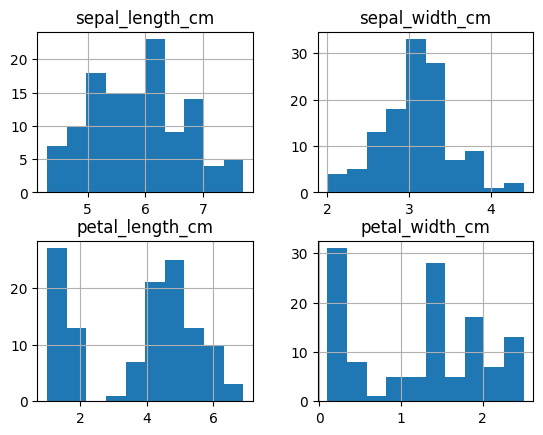

In [23]:
# analisis univariado 

df_train.hist()
plt.show()

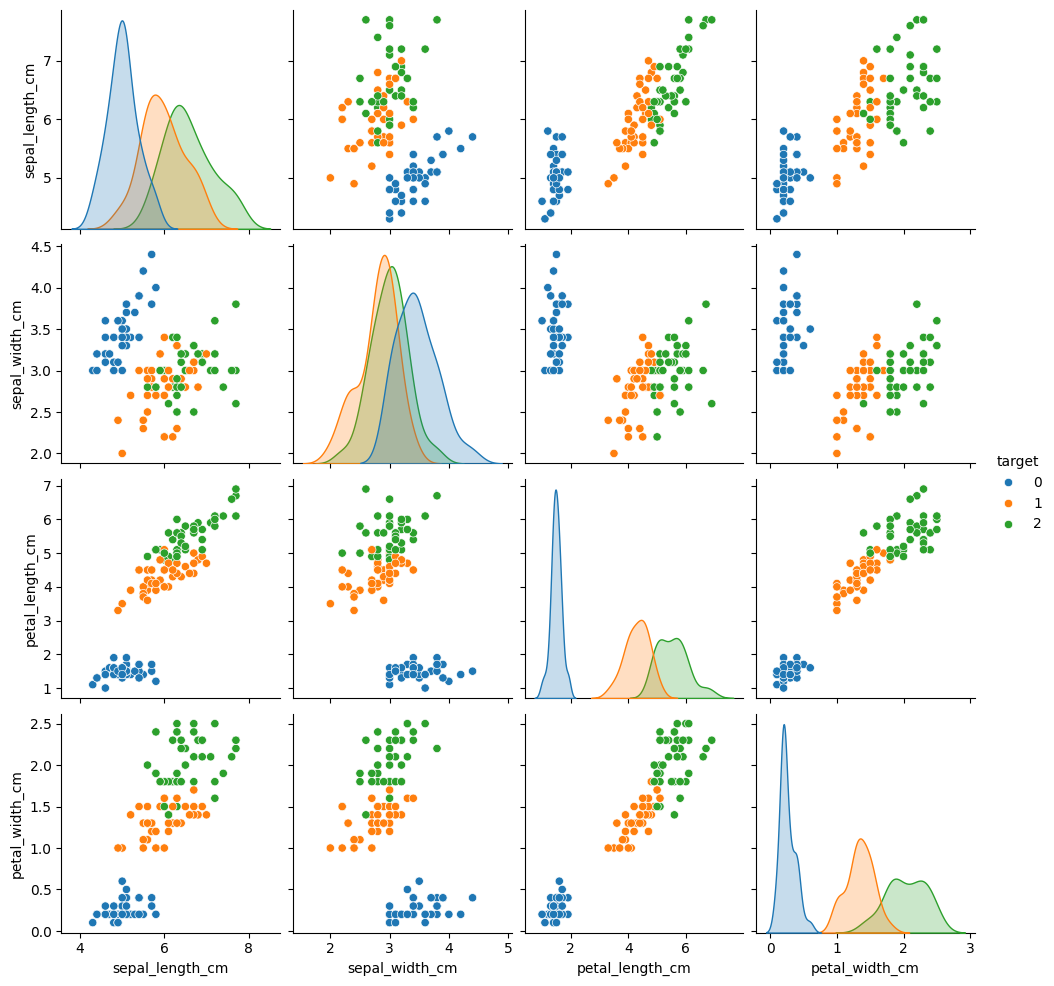

In [24]:
# analisis bivariado 

sns.pairplot(data=df_train, hue='target')
plt.show()

In [25]:
df_train.select_dtypes('number').corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.188129,0.875812,0.831525
sepal_width_cm,-0.188129,1.000000,-0.468771,-0.375482
petal_length_cm,0.875812,-0.468771,1.000000,0.963192
petal_width_cm,0.831525,-0.375482,0.963192,1.000000


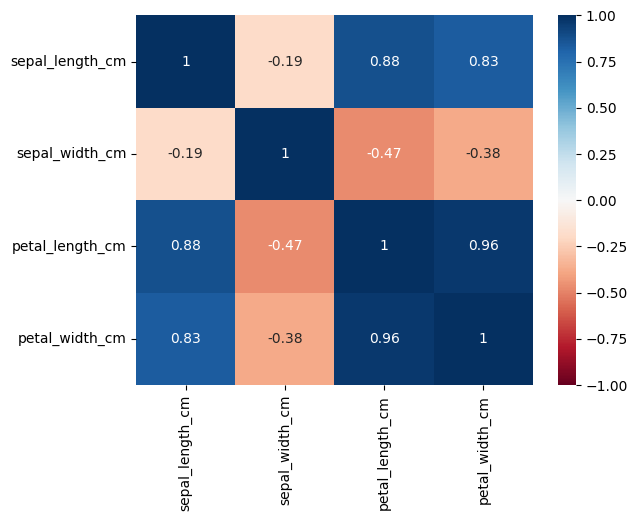

In [26]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')
plt.show()

In [27]:
# modelo de machine learning

X_train = df_train.drop('target',axis=1).reset_index(drop=True) 
y_train = df_train['target'].reset_index(drop=True) 
X_test = df_test.drop('target',axis=1).reset_index(drop=True) 
y_test = df_test['target'].reset_index(drop=True) 

In [28]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = clf_nb.predict(X_test)

In [31]:
print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.9666666666666667


In [32]:
from sklearn.datasets import load_wine

In [34]:
X, y = load_wine(return_X_y=True, as_frame= True)
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64